# Lab 1 Binglun Hou 12/20/20

In [2]:
import tensorflow as tf 
hello = tf.constant('Hello, TensorFlow!') 
print(hello)

tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)


In [3]:
## This command defines a string in tensorflow and outputs the string.


In [4]:
mnist = tf.keras.datasets.mnist

## Q1 show the figures

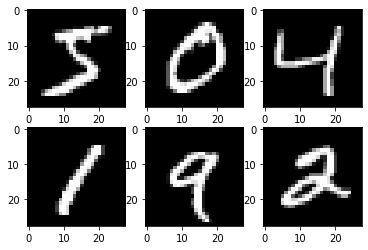

In [6]:
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(231)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(232)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(233)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(234)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(235)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(236)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## Q2 Normalize

In [7]:
# flatten 28*28 images to a 784 vector for each image
#num_pixels = X_train.shape[1] * X_train.shape[2]
#X_train = X_train.reshape(X_train.shape[0], num_pixels)
#X_test = X_test.reshape(X_test.shape[0], num_pixels)
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
#from keras.utils import np_utils
# one hot encode outputs
#Y_test = y_test
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)
#num_classes = y_test.shape[1]


In [8]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='sigmoid'), 
    tf.keras.layers.Dense(10) ])

In [9]:
predictions= model(X_train[:1]).numpy() 
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[-1.0606815 ,  0.19600318,  0.27072394,  0.0830484 ,  0.15905668,
        -0.57807684, -1.2795693 ,  0.01213743, -0.37073794,  0.16364352]],
      dtype=float32)

In [10]:
tf.nn.sigmoid(predictions).numpy()

array([[0.25717926, 0.5488445 , 0.56727064, 0.52075016, 0.53968054,
        0.35937524, 0.21762356, 0.5030343 , 0.40836272, 0.5408198 ]],
      dtype=float32)

In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [12]:
loss_fn(y_train[:1],predictions).numpy()

2.7587233

In [13]:
model.compile(optimizer='SGD', loss=loss_fn, metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 177us/sample - loss: 1.4418 - accuracy: 0.6886
Epoch 2/5
60000/60000 [==============================] - 10s 160us/sample - loss: 0.7049 - accuracy: 0.8493
Epoch 3/5
60000/60000 [==============================] - 9s 156us/sample - loss: 0.5233 - accuracy: 0.8730
Epoch 4/5
60000/60000 [==============================] - 9s 154us/sample - loss: 0.4478 - accuracy: 0.8853 - loss:
Epoch 5/5
60000/60000 [==============================] - 9s 155us/sample - loss: 0.4062 - accuracy: 0.8919


## Q3 Add another layer with 128 nodes, epochs = 10

In [14]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10) ])

model.compile(optimizer='SGD', loss=loss_fn, metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 196us/sample - loss: 2.2091 - accuracy: 0.3248
Epoch 2/10
60000/60000 [==============================] - 11s 182us/sample - loss: 1.7291 - accuracy: 0.6153
Epoch 3/10
60000/60000 [==============================] - 11s 181us/sample - loss: 1.0710 - accuracy: 0.7532
Epoch 4/10
60000/60000 [==============================] - 11s 180us/sample - loss: 0.7503 - accuracy: 0.8183
Epoch 5/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.5951 - accuracy: 0.8495
Epoch 6/10
60000/60000 [==============================] - 11s 185us/sample - loss: 0.5093 - accuracy: 0.8659
Epoch 7/10
60000/60000 [==============================] - 10s 175us/sample - loss: 0.4563 - accuracy: 0.8776
Epoch 8/10
60000/60000 [==============================] - 11s 184us/sample - loss: 0.4205 - accuracy: 0.8856
Epoch 9/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.3947 - accuracy: 0.8

In [15]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 224us/sample - loss: 0.3660 - accuracy: 0.8970 - val_loss: 0.3365 - val_accuracy: 0.9049
Epoch 2/10
48000/48000 [==============================] - 10s 215us/sample - loss: 0.3551 - accuracy: 0.9007 - val_loss: 0.3281 - val_accuracy: 0.9057
Epoch 3/10
48000/48000 [==============================] - 10s 212us/sample - loss: 0.3455 - accuracy: 0.9020 - val_loss: 0.3199 - val_accuracy: 0.9094
Epoch 4/10
48000/48000 [==============================] - 10s 210us/sample - loss: 0.3373 - accuracy: 0.9049 - val_loss: 0.3127 - val_accuracy: 0.9096
Epoch 5/10
48000/48000 [==============================] - 10s 215us/sample - loss: 0.3297 - accuracy: 0.9070 - val_loss: 0.3063 - val_accuracy: 0.9123
Epoch 6/10
48000/48000 [==============================] - 10s 217us/sample - loss: 0.3229 - accuracy: 0.9085 - val_loss: 0.3008 - val_accuracy: 0.9138
Epoch 7/10
48000/48000 [====================

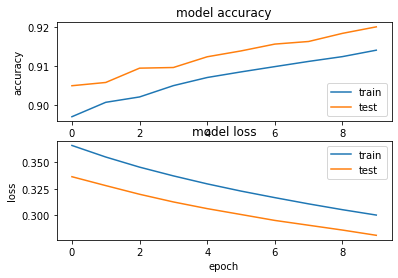

In [16]:
plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='lower right') 
plt.subplot(2,1,2) 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 
plt.show()

In [17]:
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                    tf.keras.layers.Dense(128, activation='sigmoid'), 
                                    tf.keras.layers.Dense(128, activation='sigmoid'), 
                                    tf.keras.layers.Dropout(0.2), 
                                    tf.keras.layers.Dense(10)])

## Q4 train model again with adding SGD and batch = 200

In [18]:
model.compile(optimizer='SGD', loss=loss_fn, metrics=['accuracy']) 
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size = 200)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 103us/sample - loss: 2.3530 - accuracy: 0.1086 - val_loss: 2.2802 - val_accuracy: 0.1123
Epoch 2/10
48000/48000 [==============================] - 4s 78us/sample - loss: 2.3198 - accuracy: 0.1198 - val_loss: 2.2594 - val_accuracy: 0.1845
Epoch 3/10
48000/48000 [==============================] - 4s 88us/sample - loss: 2.2985 - accuracy: 0.1349 - val_loss: 2.2377 - val_accuracy: 0.2878
Epoch 4/10
48000/48000 [==============================] - 4s 82us/sample - loss: 2.2745 - accuracy: 0.1519 - val_loss: 2.2139 - val_accuracy: 0.2688
Epoch 5/10
48000/48000 [==============================] - 4s 92us/sample - loss: 2.2484 - accuracy: 0.1712 - val_loss: 2.1864 - val_accuracy: 0.5368
Epoch 6/10
48000/48000 [==============================] - 4s 89us/sample - loss: 2.2159 - accuracy: 0.1961 - val_loss: 2.1543 - val_accuracy: 0.5663
Epoch 7/10
48000/48000 [==============================]

In [19]:
##  I expect speed since model is being trained simultaneously on mini batches. Accuracy decreased.

In [20]:
## Step 3

In [21]:
import pandas as pd
file = '~/Downloads/pima-indians-diabetes.csv' 
dataframe = pd.read_csv(file) 
dataframe.head()

,ID,preg_no,plasma,diastolic,triceps,serum,mass,pedigree,age,diabete
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [22]:
dataframe.describe()

,ID,preg_no,plasma,diastolic,triceps,serum,mass,pedigree,age,diabete
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,384.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,192.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,384.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,576.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,768.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
from sklearn.model_selection import train_test_split 

In [24]:
df = dataframe.copy()

In [25]:
Y = dataframe['diabete'] 
X = dataframe.drop(['ID','diabete'], axis=1)
#df_features.replace('?', -99999, inplace=True)


In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
import numpy as np
normalizer = StandardScaler()
x_train = normalizer.fit_transform(x_train)
x_test = normalizer.transform(x_test)

x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [27]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(500, input_shape=(8,), activation="relu"),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') ])
    
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=10, batch_size=70, validation_data=(x_test, y_test))


Train on 614 samples, validate on 154 samples
Epoch 1/10
614/614 [==============================] - 2s 3ms/sample - loss: 0.2051 - accuracy: 0.7085 - val_loss: 0.1825 - val_accuracy: 0.7403
Epoch 2/10
614/614 [==============================] - 0s 325us/sample - loss: 0.1588 - accuracy: 0.7687 - val_loss: 0.1639 - val_accuracy: 0.7662
Epoch 3/10
614/614 [==============================] - 0s 309us/sample - loss: 0.1464 - accuracy: 0.7818 - val_loss: 0.1631 - val_accuracy: 0.7727
Epoch 4/10
614/614 [==============================] - 0s 316us/sample - loss: 0.1401 - accuracy: 0.7932 - val_loss: 0.1680 - val_accuracy: 0.7662
Epoch 5/10
614/614 [==============================] - 0s 323us/sample - loss: 0.1377 - accuracy: 0.7964 - val_loss: 0.1711 - val_accuracy: 0.7597
Epoch 6/10
614/614 [==============================] - 0s 314us/sample - loss: 0.1353 - accuracy: 0.7964 - val_loss: 0.1711 - val_accuracy: 0.7532
Epoch 7/10
614/614 [==============================] - 0s 319us/sample - loss: 0.

## Q5- Design a neural network with 2 hidden layers (hidden layer 1 with 12 nodes and hidden layer 2 with 8 nodes)
## report the accuracy and draw the learning curves. 
## Apply a dropout to see if you could get any better result. Use ‘adam’ as optimizer.

In [28]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(12, input_shape=(8,), activation="sigmoid"),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid') ])
    
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=10, batch_size=70, validation_data=(x_test, y_test))
hist = model.fit(x_train,y_train, epochs=10, batch_size=70, validation_data=(x_test, y_test))

Train on 614 samples, validate on 154 samples
Epoch 1/10
614/614 [==============================] - 2s 3ms/sample - loss: 0.3377 - accuracy: 0.3811 - val_loss: 0.3137 - val_accuracy: 0.3247
Epoch 2/10
614/614 [==============================] - 0s 295us/sample - loss: 0.3042 - accuracy: 0.4169 - val_loss: 0.2929 - val_accuracy: 0.3182
Epoch 3/10
614/614 [==============================] - 0s 248us/sample - loss: 0.2961 - accuracy: 0.3974 - val_loss: 0.2757 - val_accuracy: 0.3571
Epoch 4/10
614/614 [==============================] - 0s 247us/sample - loss: 0.2756 - accuracy: 0.4202 - val_loss: 0.2613 - val_accuracy: 0.3831
Epoch 5/10
614/614 [==============================] - 0s 273us/sample - loss: 0.2635 - accuracy: 0.4984 - val_loss: 0.2500 - val_accuracy: 0.5390
Epoch 6/10
614/614 [==============================] - 0s 369us/sample - loss: 0.2538 - accuracy: 0.5342 - val_loss: 0.2416 - val_accuracy: 0.6429
Epoch 7/10
614/614 [==============================] - 0s 285us/sample - loss: 0.

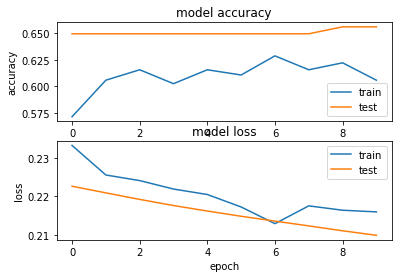

In [29]:
plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='lower right') 
plt.subplot(2,1,2) 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 
plt.show()